In [3]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap


In [4]:
# function that retrieves csv files from given folder
def retrieve_csv_files(folder_name):
    # if folder name doesn't end with '/' sign
    # add to it
    if not folder_name.endswith("/"):
        folder_name += "/"

    # get all files in that folder
    file_names = os.listdir(folder_name)
    # filter file names and take only csv files
    # create empty list for result files
    result = []
    # take each file name from the list
    for file_name in file_names:
        # if file name ends with .csv
        if file_name.endswith(".csv"):
            # add this file name to the list
            result.append(folder_name + file_name)
    # return csv files list
    return result


In [5]:
# function that reads only needed columns from csv file
# and returns dataframe
def read_csv(file_name, columns):
    # use try block in case file doesn't exist
    try:
        # read csv file and return
        return pd.read_csv(file_name, usecols=columns)
    except:
        # in case file doesn't exist, inform user
        print("File {} not found".format(file_name))
        # return None
        return None

In [6]:
# function that reads several csv files, stack them and return
def read_csvs(file_names, needed_columns):
    # create empty data frame from the columns
    data = pd.DataFrame(columns=needed_columns)
    # loop to take each file name
    for file_name in file_names:
        # read each file to temporary data frame
        temp = read_csv(file_name, needed_columns)
        # append temporary data to main data
        data = data.append(temp)

    # since we have stacked several data frames
    # we need to reset the index
    data = data.reset_index()
    data.drop(columns=['index'], inplace=True)
    # return data frame
    return data

In [7]:
# folder name where data is stored
folder_name = "ban601data"

# get csv files from folder
csv_files = retrieve_csv_files(folder_name)
# display file names
csv_files

['ban601data/10001 2021-01-01 to 2021-12-31.csv',
 'ban601data/10006 2021-01-01 to 2021-12-31.csv',
 'ban601data/10011 2021-01-01 to 2021-12-31.csv',
 'ban601data/10017 2021-01-01 to 2021-12-31.csv',
 'ban601data/94017 2021-01-01 to 2021-12-31.csv',
 'ban601data/94105 2021-01-01 to 2021-12-31.csv',
 'ban601data/94127&94132  2021-01-01 to 2021-12-31.csv']

In [8]:
# list of columns needed
needed_columns = ["name", "datetime", "temp"]
# read all data from the list of file names
data = read_csvs(csv_files, needed_columns)
# see the dimension of main data set
data.shape

C:\Users\STSC\AppData\Local\Temp\ipykernel_664\2219463593.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp)
C:\Users\STSC\AppData\Local\Temp\ipykernel_664\2219463593.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp)
C:\Users\STSC\AppData\Local\Temp\ipykernel_664\2219463593.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp)
C:\Users\STSC\AppData\Local\Temp\ipykernel_664\2219463593.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp)
C:\Users\STSC\AppData\Local\Temp\ipykernel_664\2219463593.py:10: FutureWarning: The frame.append met

(2920, 3)

In [9]:
# print some rows of data
data.head()

,name,datetime,temp
0,10001,2021-01-01,36.7
1,10001,2021-01-02,42.2
2,10001,2021-01-03,36.6
3,10001,2021-01-04,38.4
4,10001,2021-01-05,38.6


In [10]:
# rename column 'name' to 'zipcode'
data.rename(columns={'name': 'zipcode'}, inplace=True)
# change type of zipcode column
data['zipcode'] = data['zipcode'].astype(str)
# print some rows of data
data.head()


,zipcode,datetime,temp
0,10001,2021-01-01,36.7
1,10001,2021-01-02,42.2
2,10001,2021-01-03,36.6
3,10001,2021-01-04,38.4
4,10001,2021-01-05,38.6


In [11]:

# needed columns in geo data
geo_columns = ["state", "state_abbr", "zipcode", "county", "city"]
# read geo data
geo = read_csv("geo-data.csv", geo_columns)
# change type of zipcode column
data['zipcode'] = data['zipcode'].astype(str)
# see some data of geo
geo.head()


,state,state_abbr,zipcode,county,city
0,Alabama,AL,35004,St. Clair,Acmar
1,Alabama,AL,35005,Jefferson,Adamsville
2,Alabama,AL,35006,Jefferson,Adger
3,Alabama,AL,35007,Shelby,Keystone
4,Alabama,AL,35010,Tallapoosa,New site


In [12]:
# merge data by zipcode column, use left join
merged = pd.merge(data, geo, how="left", on=["zipcode"])
# see some data of merged
merged.head()

,zipcode,datetime,temp,state,state_abbr,county,city
0,10001,2021-01-01,36.7,New york,NY,New York,New york
1,10001,2021-01-02,42.2,New york,NY,New York,New york
2,10001,2021-01-03,36.6,New york,NY,New York,New york
3,10001,2021-01-04,38.4,New york,NY,New York,New york
4,10001,2021-01-05,38.6,New york,NY,New York,New york


In [13]:
# see which rows has null values
merged[merged.isna().any(axis=1)]

,zipcode,datetime,temp,state,state_abbr,county,city
1825,94105,2021-01-01,50.0,NaN,CA,San Francisco,San francisco
1826,94105,2021-01-02,52.8,NaN,CA,San Francisco,San francisco
1827,94105,2021-01-03,52.1,NaN,CA,San Francisco,San francisco
1828,94105,2021-01-04,55.6,NaN,CA,San Francisco,San francisco
1829,94105,2021-01-05,50.3,NaN,CA,San Francisco,San francisco
...,...,...,...,...,...,...,...
2185,94105,2021-12-27,48.0,NaN,CA,San Francisco,San francisco
2186,94105,2021-12-28,45.7,NaN,CA,San Francisco,San francisco
2187,94105,2021-12-29,47.2,NaN,CA,San Francisco,San francisco
2188,94105,2021-12-30,47.0,NaN,CA,San Francisco,San francisco


In [14]:
# state column for CA has null values, so replace null values with California
merged['state'] = merged['state'].fillna('California')
# check if we have any more null values
merged.isnull().any().any()

False

In [15]:
# add month column to data
merged['month'] = pd.DatetimeIndex(merged['datetime']).month
# add leading zeros to month numbers
merged['month'] = merged['month'].apply(lambda x: "{:02d}".format(x))

# see some data of merged
merged.head()

,zipcode,datetime,temp,state,state_abbr,county,city,month
0,10001,2021-01-01,36.7,New york,NY,New York,New york,01
1,10001,2021-01-02,42.2,New york,NY,New York,New york,01
2,10001,2021-01-03,36.6,New york,NY,New York,New york,01
3,10001,2021-01-04,38.4,New york,NY,New York,New york,01
4,10001,2021-01-05,38.6,New york,NY,New York,New york,01


In [16]:
# take needed columns only
data = merged[['zipcode','temp','month']]
# group by zipcode and month and calculate max  temp and sort by zipcode
grouped_data = data.groupby(['zipcode','month']).max().sort_values('zipcode').unstack('month')
grouped_data

temp                                                              \
month      01    02    03    04    05    06    07    08    09    10    11   
zipcode                                                                     
10001    43.3  46.4  62.9  67.1  79.6  87.1  84.6  85.9  78.1  70.2  61.0   
10006    43.6  46.1  62.2  65.2  79.2  86.2  84.8  86.2  79.2  72.4  61.5   
10011    43.5  46.3  62.6  66.4  79.4  86.9  84.8  86.1  78.6  71.1  61.3   
10017    43.4  46.5  62.9  67.2  79.6  87.1  84.6  85.9  78.1  70.1  61.0   
94017    62.5  55.9  62.9  59.7  57.0  63.6  66.0  71.5  67.2  62.4  60.8   
94105    64.7  59.6  65.4  64.7  63.7  71.5  66.2  70.9  72.7  68.9  62.2   
94127    63.8  59.0  65.2  63.8  62.3  69.1  65.6  70.2  71.7  66.8  61.9   
94132    63.6  58.9  65.2  63.7  62.1  68.9  65.5  70.1  71.5  66.5  61.9   

               
month      12  
zipcode        
10001    57.8  
10006    58.0  
10011    57.9  
10017    57.8  
94017    60.2  
94105    58.3  
94127    59.0  
94132    59.1

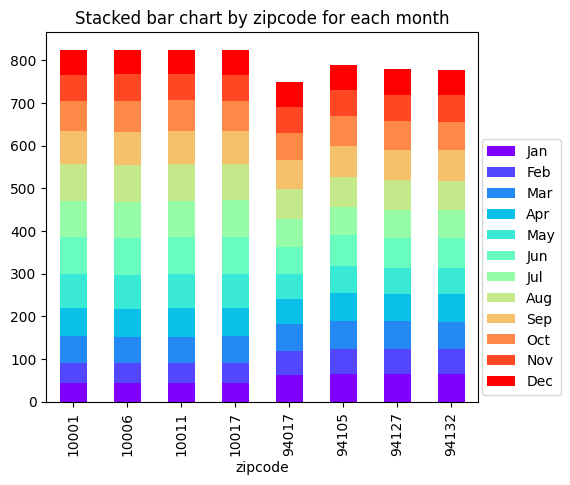

In [17]:
# get colormap for graph so that we don't get duplicate colors
cmap = cm.get_cmap('rainbow')

# Stacked bar chart of max temperatures for each zip code in year 2021
grouped_data.plot(kind='bar', stacked=True, title='Stacked bar chart by zipcode for each month',cmap=cmap)
# add legend
plt.legend(["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],loc='lower center', bbox_to_anchor=(1.1, 0));
# make room for legend
plt.subplots_adjust(right=0.8)
# show graph
plt.show()

In [18]:
# group by zipcode and month and calculate mean  temp and sort by zipcode
grouped_data = data.groupby(['zipcode','month']).mean().sort_values('zipcode').unstack('zipcode')
grouped_data

temp                                                         \
zipcode      10001      10006      10011      10017      94017      94105   
month                                                                       
01       34.941935  36.477419  35.574194  34.890323  51.480645  53.109677   
02       34.357143  35.357143  34.721429  34.325000  51.675000  54.642857   
03       45.625806  45.870968  45.719355  45.622581  51.032258  54.135484   
04       54.083333  53.946667  54.043333  54.110000  52.280000  55.393333   
05       62.419355  62.590323  62.512903  62.435484  54.196774  58.277419   
06       74.013333  73.853333  73.996667  74.026667  59.280000  63.150000   
07       75.829032  77.058065  76.312903  75.767742  62.067742  62.296774   
08       77.238710  78.087097  77.609677  77.212903  64.551613  64.009677   
09       70.850000  72.673333  71.563333  70.763333  61.916667  63.816667   
10       62.490323  64.470968  63.267742  62.383871  57.951613  61.270968   
11       47.040000  48.470000  47.630000  47.026667  56.833333  57.376667   
12       43.874194  44.132258  43.996774  43.893548  50.593548  50.122581   

                               
zipcode      94127      94132  
month                          
01       52.864516  52.790323  
02       54.289286  54.171429  
03       53.812903  53.706452  
04       55.026667  54.950000  
05       57.580645  57.461290  
06       62.783333  62.723333  
07       62.132258  62.116129  
08       63.754839  63.729032  
09       63.086667  62.980000  
10       60.487097  60.370968  
11       57.423333  57.440000  
12       50.396774  50.441935

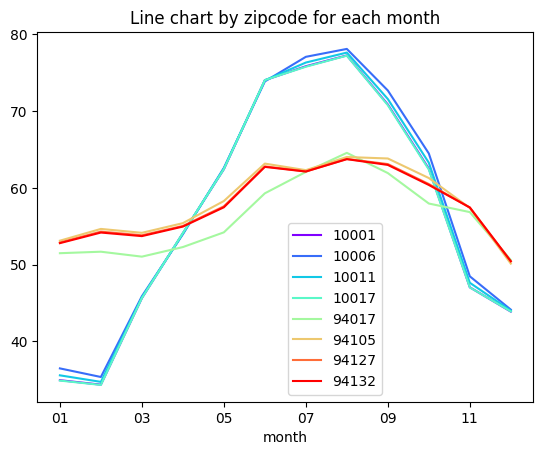

In [19]:
# get zips from the column names
zips = [zip[1] for zip in grouped_data.columns]

# Line chart of avg temperatures for each zip code for each month
grouped_data.plot(kind='line', stacked=False, title='Line chart by zipcode for each month',cmap=cmap)
# add legend
plt.legend(zips, loc='lower center', bbox_to_anchor=(0.6, 0));
# show graph
plt.show()

In [20]:
# determine zip codes of San francisco
san_francisco = merged[merged['city']=='San francisco']
zip_codes = san_francisco['zipcode'].unique()
zip_codes

array(['94105', '94127', '94132'], dtype=object)

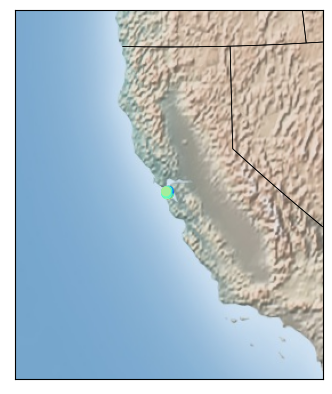

In [27]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
fig = Basemap(projection='lcc', resolution='c', lat_0=37.7, lon_0=-122.4, width=1E6, height=1.2E6)
fig.shadedrelief()
fig.drawstates(color='black')

df=pd.read_csv('C:/Users/STSC/Desktop/602 PROJECT/socal_median_temperatures.csv')
latitude = df['latitude'].values
longitude = df['longitude'].values
temperature = df['temperature'].values

fig.scatter(df['longitude'], df['latitude'], latlon=True,c= df["temperature"],cmap='rainbow', alpha=0.5)